In [1]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import *
from LowLevelModules.NIdaqAPD import APDCounter, ExtClock

"""#######################################   USER INPUT   #################################################"""
terminal = '/Dev1/PFI1'
frequency = 10    #Hz
save_data = False
"""#########################################################################################################"""

delta_t = 1 / frequency

<IPython.core.display.Javascript object>


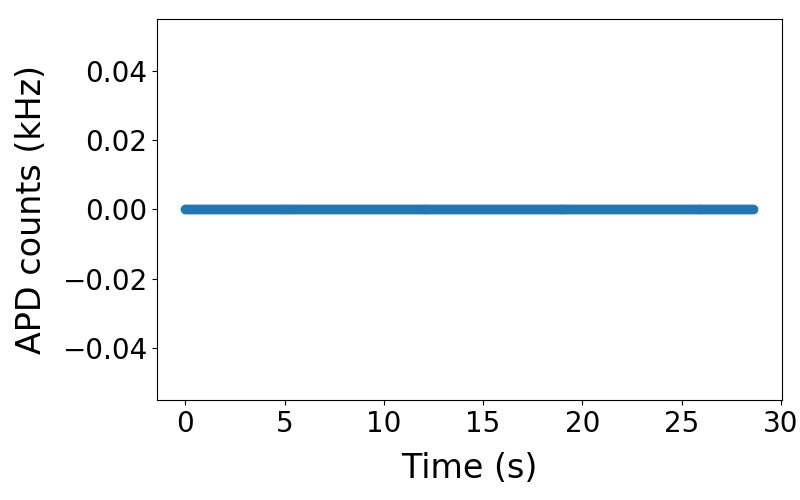

In [3]:
# CREATE EXT CLOCK TO GATE THE READING OF PULSES COMING FROM THE APD
ext_clock_task = ExtClock(frequency, task_name='Clock count rate')

# CREATE THE APD COUNTER
APD1 = APDCounter(terminal, task_name='Count rate')
APD1.sync_to_ext_clock()

# start task and count
APD1.start()

# read the count rate: should be written in that wa but doesn't seem to work at the moment
# cr = CounterReader()
# cts = cr.read_many_sample_double(cts, number_of_samples_per_channel=-1, timeout=10.0)

old_cts_cum = 0
lp = LivePlot(1, 8, 5, 'o', 'Time (s)', 'APD counts (kHz)')
t, cts = [], []
i = 0

while True:
    try:
        cts_cum = APD1.read() * frequency / 1000
        current_cts = cts_cum - old_cts_cum

        # append new data and plot
        t.append(i*delta_t)
        cts.append(current_cts)
        lp.plot_live(t, cts)

        # store old data and go to next loop iteration
        old_cts_cum = cts_cum
        i += 1
    except KeyboardInterrupt:
        # press the stop button to trigger this
        APD1.close()
        ext_clock_task.close()
        break

if save_data:
    data_type = 'PLvsTime'
    data_header = "Time (s)     APD counts (kHz)"
    data_array = np.array([pos, cts]).T
    data_save(data_array, lp.fig, data_type, data_header)